In [1]:
# si le package ggplot2 n'a jamais été installé, exécuter la ligne suivante :
# install.packages("ggplot2")
library("ggplot2")

data = read.csv("operations_enrichies.csv")
data$date_operation = as.Date(data$date_operation)

# Représenter une variable sous forme de graphique

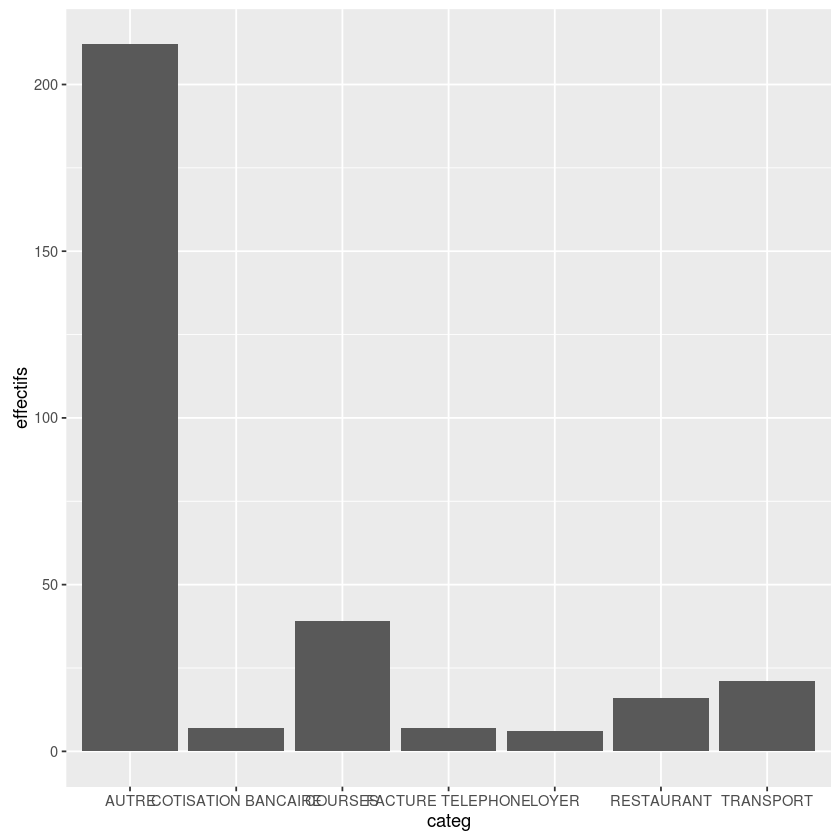

In [2]:
value_counts = as.data.frame(table(data$categ))
colnames(value_counts) = c("categ","effectifs")
ggplot(value_counts, aes(categ,effectifs)) + geom_bar(stat = "identity")

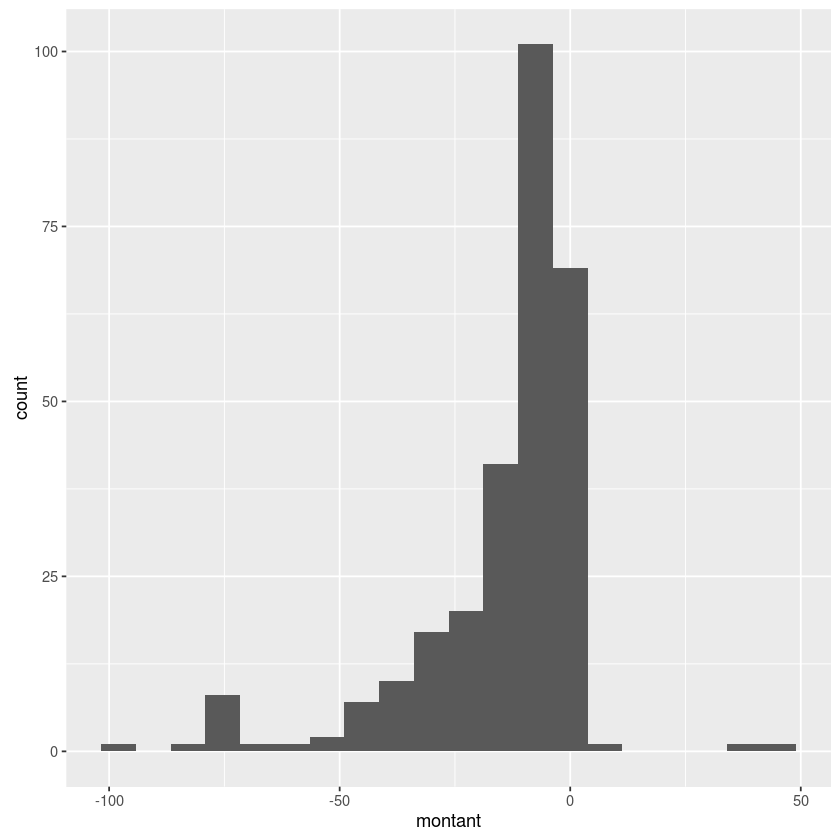

In [3]:
subset = data[abs(data$montant) < 100,]
ggplot(subset, aes(montant)) + geom_histogram(bins=20)

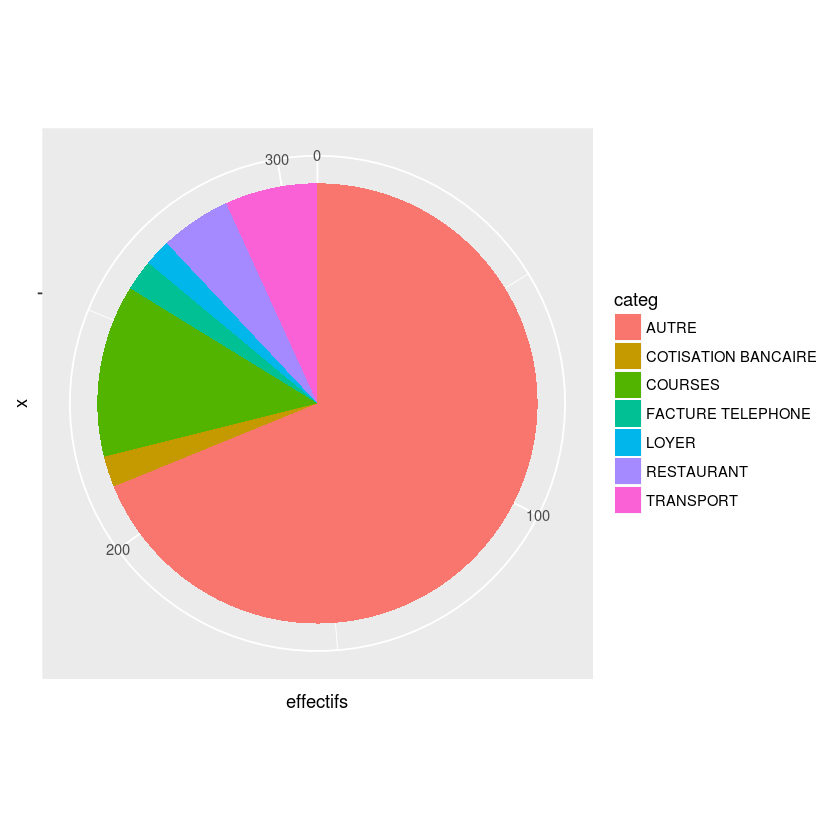

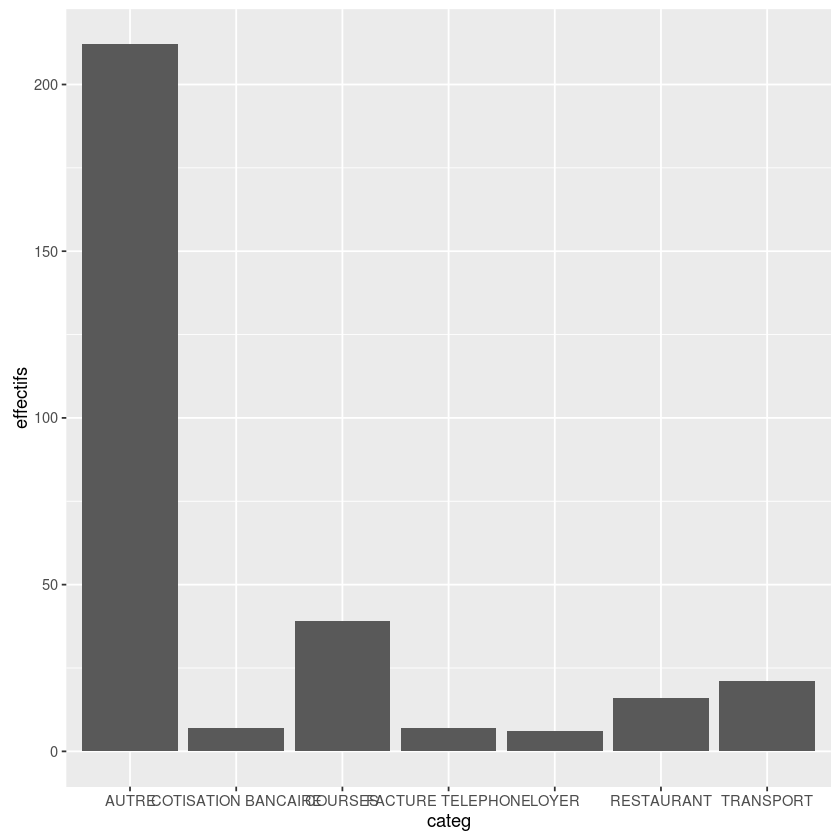

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


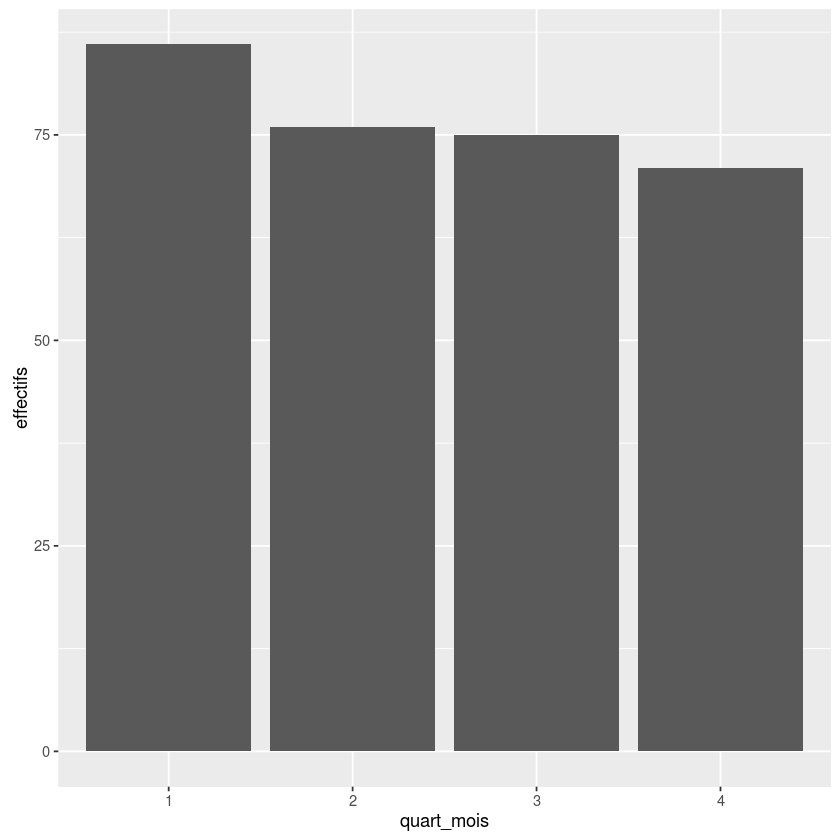

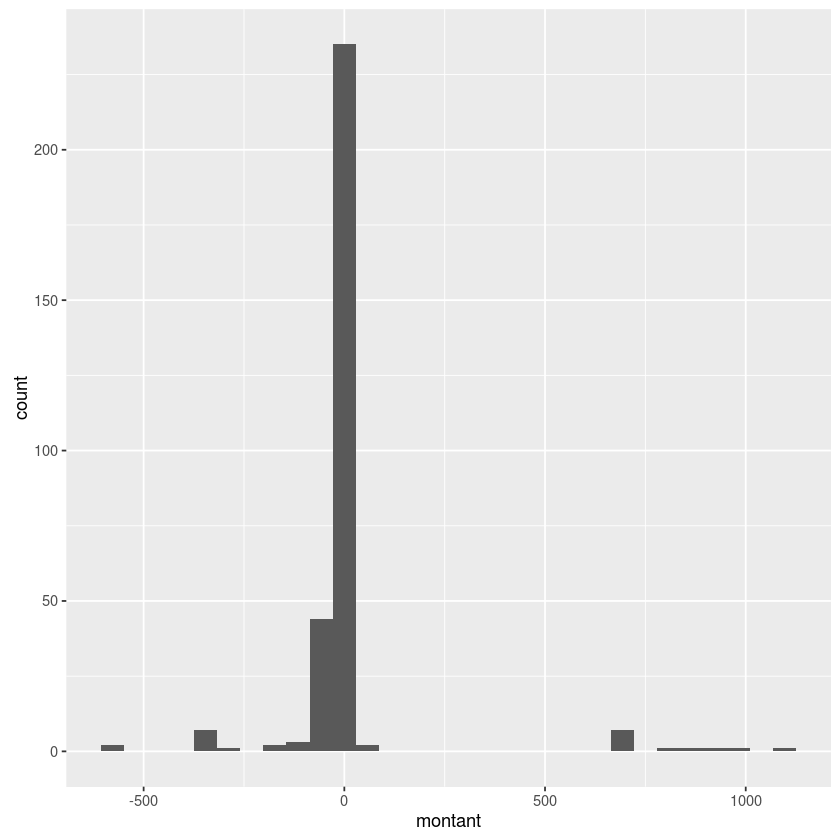

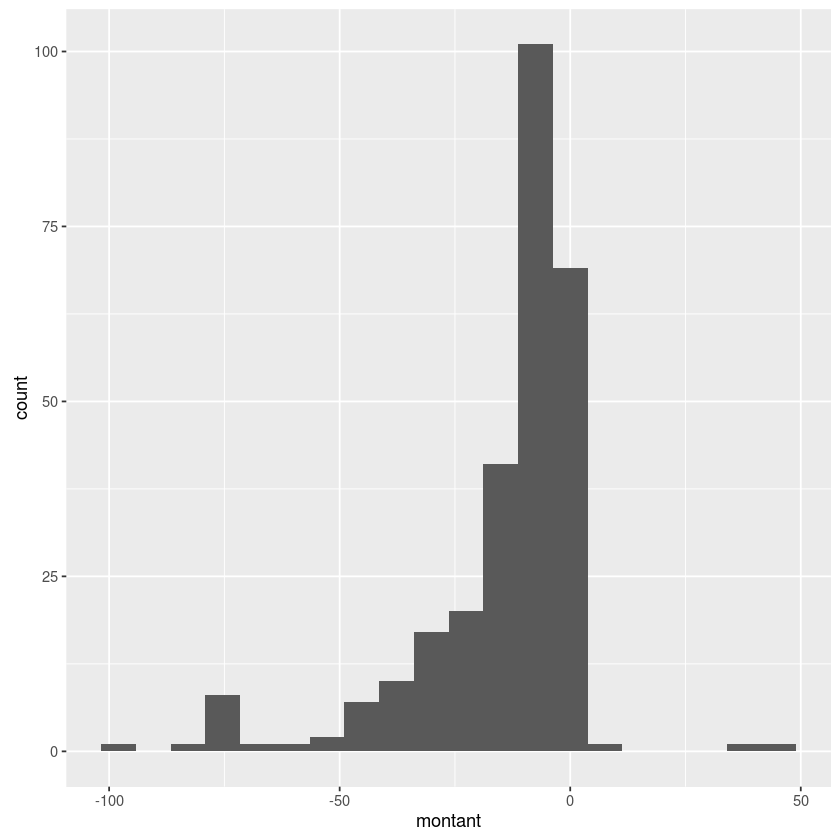

In [4]:
# VARIABLE QUALITATIVE
value_counts = as.data.frame(table(data$categ))
colnames(value_counts) = c("categ","effectifs")
# Diagramme en secteurs
ggplot(value_counts, aes("",effectifs,fill=categ)) +
    geom_bar(width = 1, stat = "identity") +
    coord_polar("y")

# Diagramme en tuyaux d'orgues
ggplot(value_counts, aes(categ,effectifs)) + geom_bar(stat = "identity")

# VARIABLE QUANTITATIVE
# Diagramme en bâtons
value_counts = as.data.frame(table(data$quart_mois))
colnames(value_counts) = c("quart_mois","effectifs")
ggplot(value_counts, aes(quart_mois,effectifs)) + geom_bar(stat = "identity")

# Histogramme
ggplot(data, aes(montant)) + geom_histogram()

# Histogramme plus beau
subset = data[abs(data$montant) < 100,]
ggplot(subset, aes(montant)) + geom_histogram(bins=20)

In [5]:
tab = as.data.frame(table(data$quart_mois))
colnames(tab) = c("quart_mois","n")
tab

quart_mois,n
1,86
2,76
3,75
4,71


In [6]:
tab["f"] = tab["n"] / nrow(data)

In [7]:
tab

quart_mois,n,f
1,86,0.2792208
2,76,0.2467532
3,75,0.2435065
4,71,0.2305195


In [8]:
tab = tab[order(tab$quart_mois),]
tab["F"] = cumsum(tab["f"])
tab

quart_mois,n,f,F
1,86,0.2792208,0.2792208
2,76,0.2467532,0.5259740
3,75,0.2435065,0.7694805
4,71,0.2305195,1.0000000


# Mesures de tendance centrale, de dispersion et de forme

In [9]:
mean(data$montant)

[1] 2.872565

In [10]:
median(data$montant)

[1] -9.6

[1] "--------------------"
[1] "AUTRE"
[1] "moy"
[1] 23.43321
[1] "med"
[1] -8.31
[1] "var"
[1] 40593.31
[1] "std"
[1] 201.4778
[1] "skw"
[1] 3.099403
[1] "kur"
[1] 15.39042
[1] "--------------------"
[1] "TRANSPORT"
[1] "moy"
[1] -52.99714
[1] "med"
[1] -53.1
[1] "var"
[1] 2315.268
[1] "std"
[1] 48.11723
[1] "skw"
[1] -1.157273
[1] "kur"
[1] 4.431265
[1] "--------------------"
[1] "FACTURE TELEPHONE"
[1] "moy"
[1] -12.04571
[1] "med"
[1] -7.02
[1] "var"
[1] 122.5222
[1] "std"
[1] 11.06898
[1] "skw"
[1] -1.842113
[1] "kur"
[1] 4.666068
[1] "--------------------"
[1] "COURSES"
[1] "moy"
[1] -16.34128
[1] "med"
[1] -12.24
[1] "var"
[1] 181.6839
[1] "std"
[1] 13.47902
[1] "skw"
[1] -1.198275
[1] "kur"
[1] 4.256251
[1] "--------------------"
[1] "COTISATION BANCAIRE"
[1] "moy"
[1] -1.885714
[1] "med"
[1] -1.92
[1] "var"
[1] 0.001828571
[1] "std"
[1] 0.0427618
[1] "skw"
[1] 0.2886751
[1] "kur"
[1] 1.083333
[1] "--------------------"
[1] "RESTAURANT"
[1] "moy"
[1] -10.3325
[1] "med"
[1] -10.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


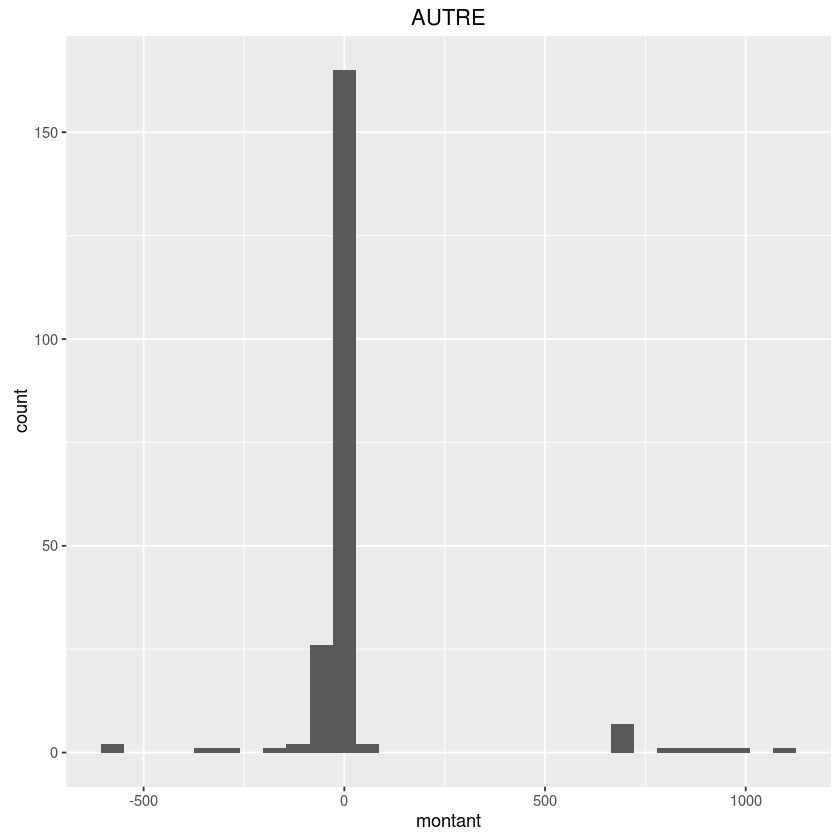

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


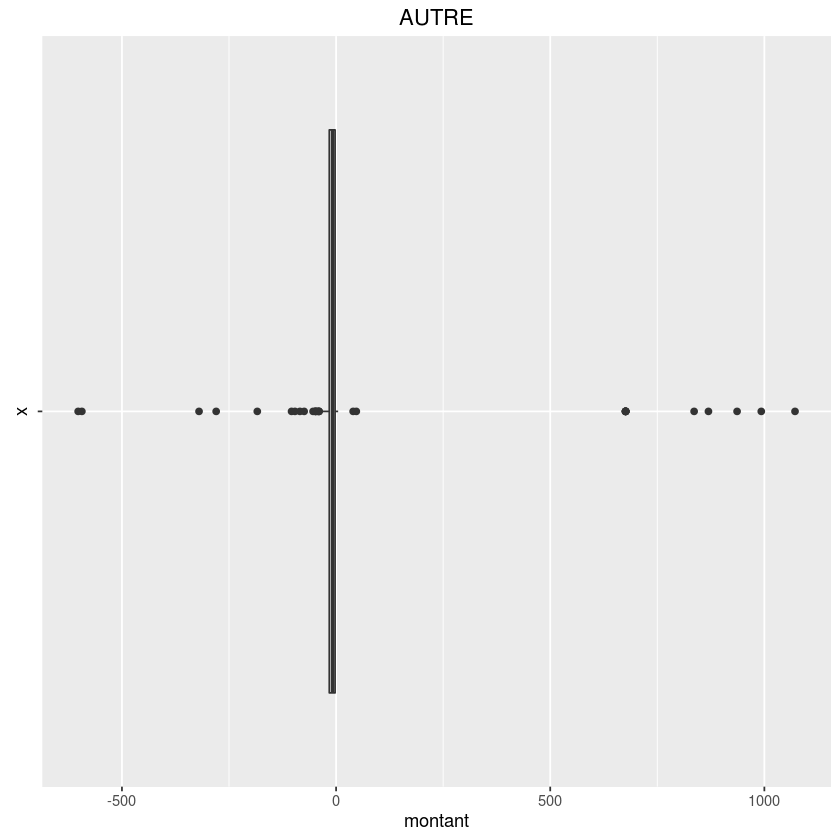

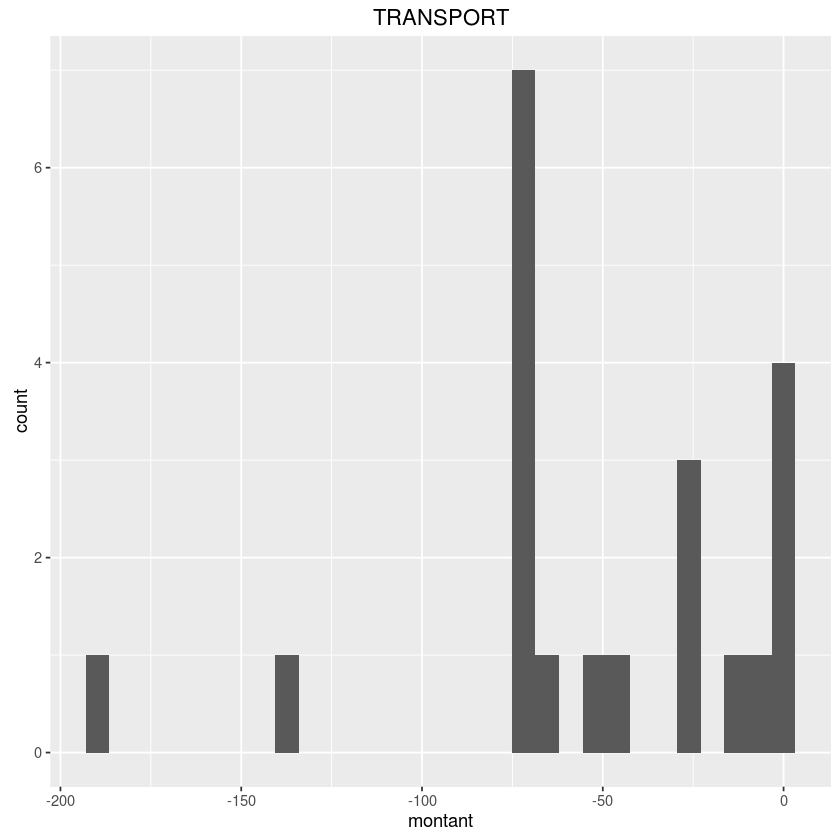

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


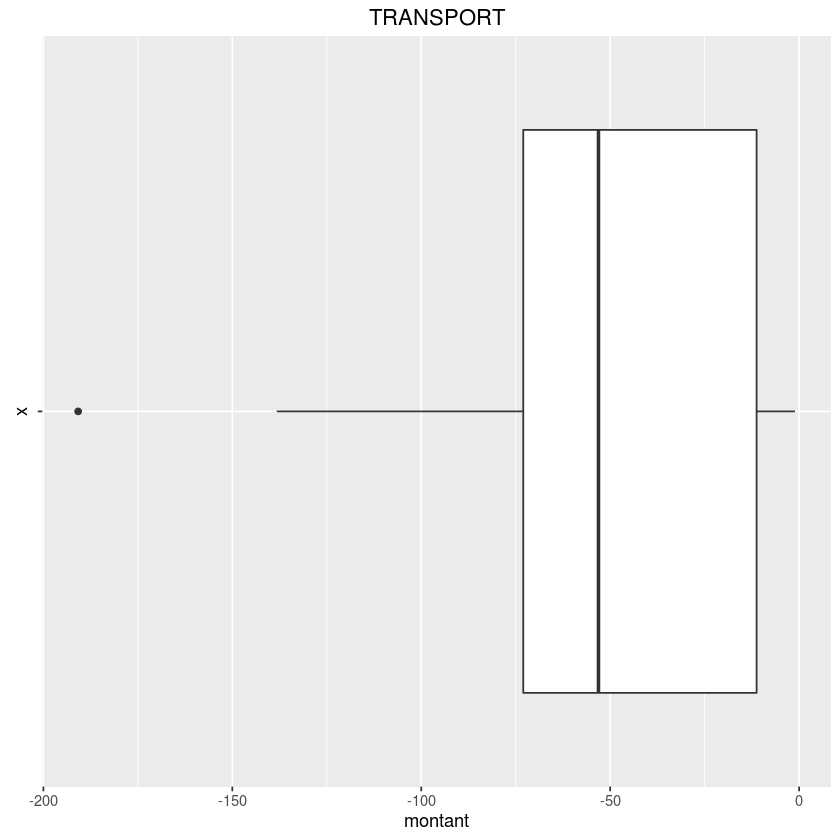

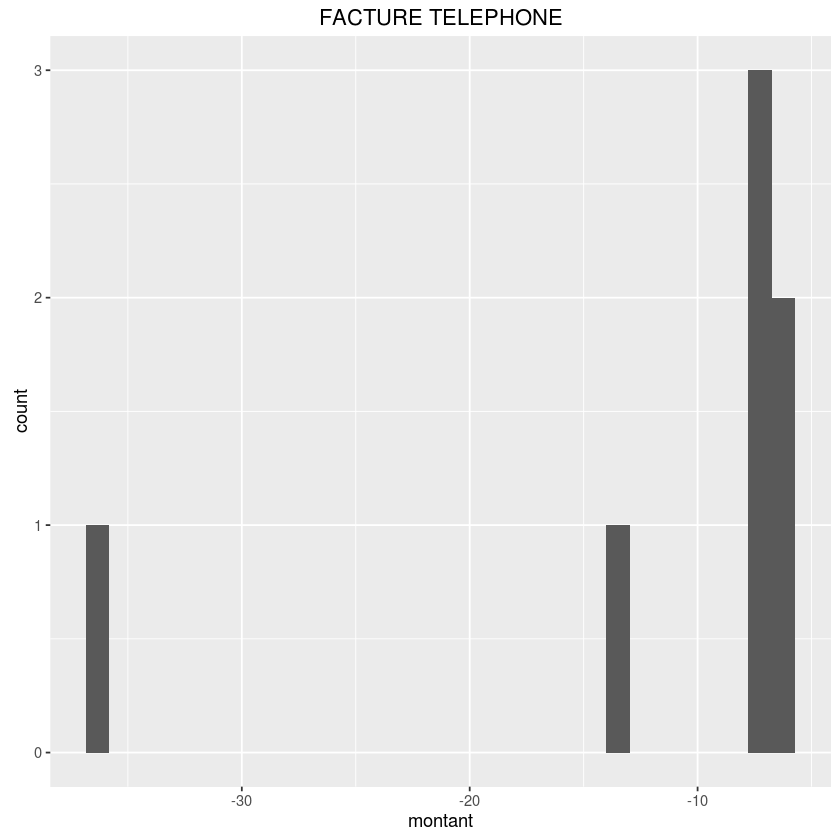

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


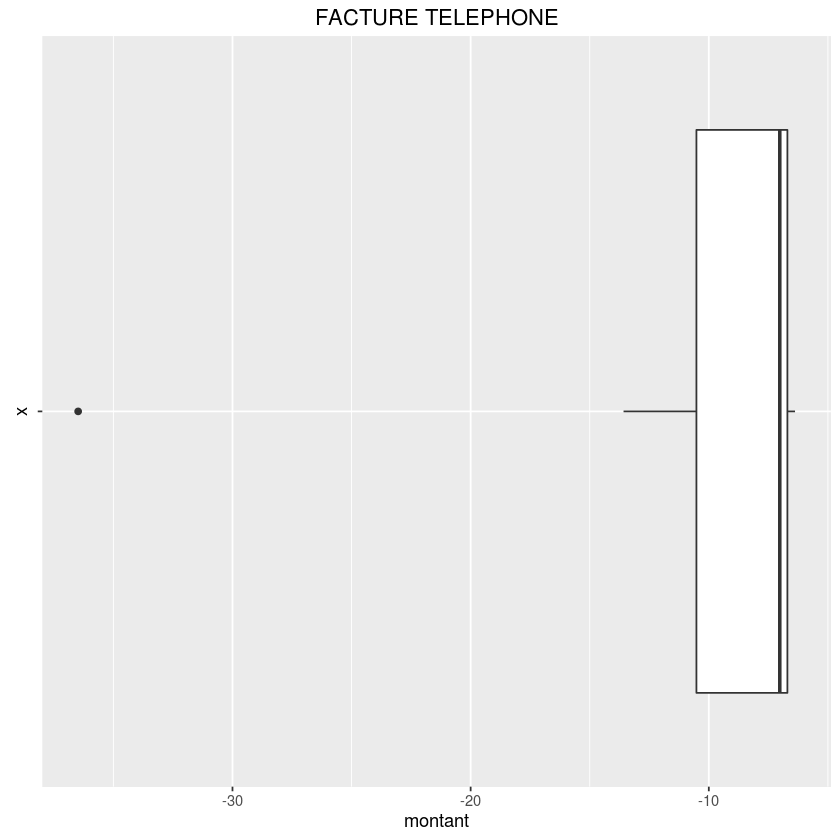

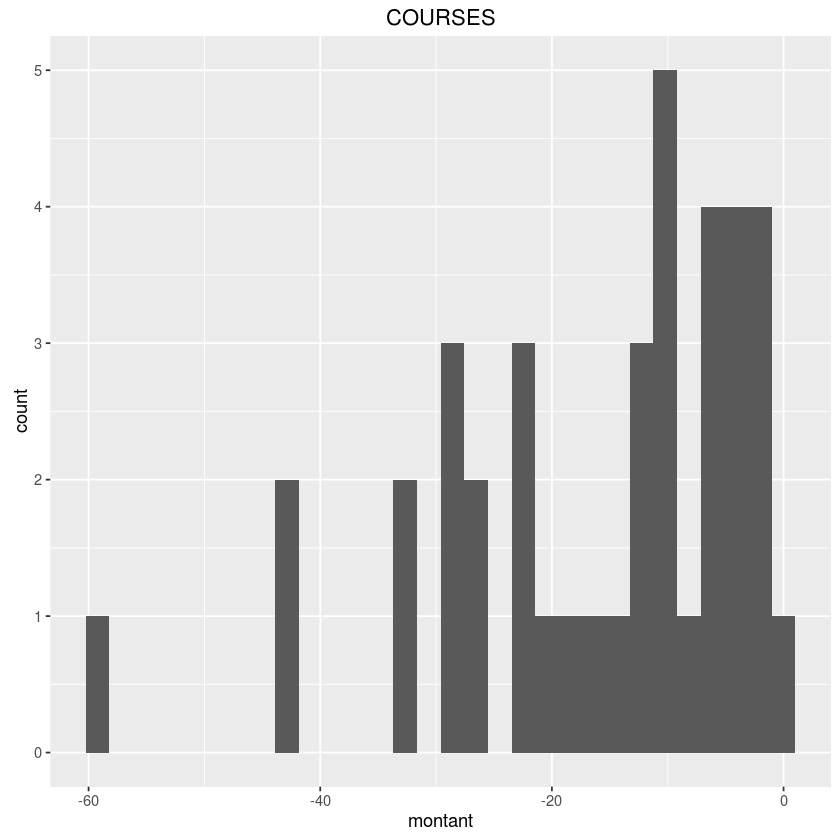

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


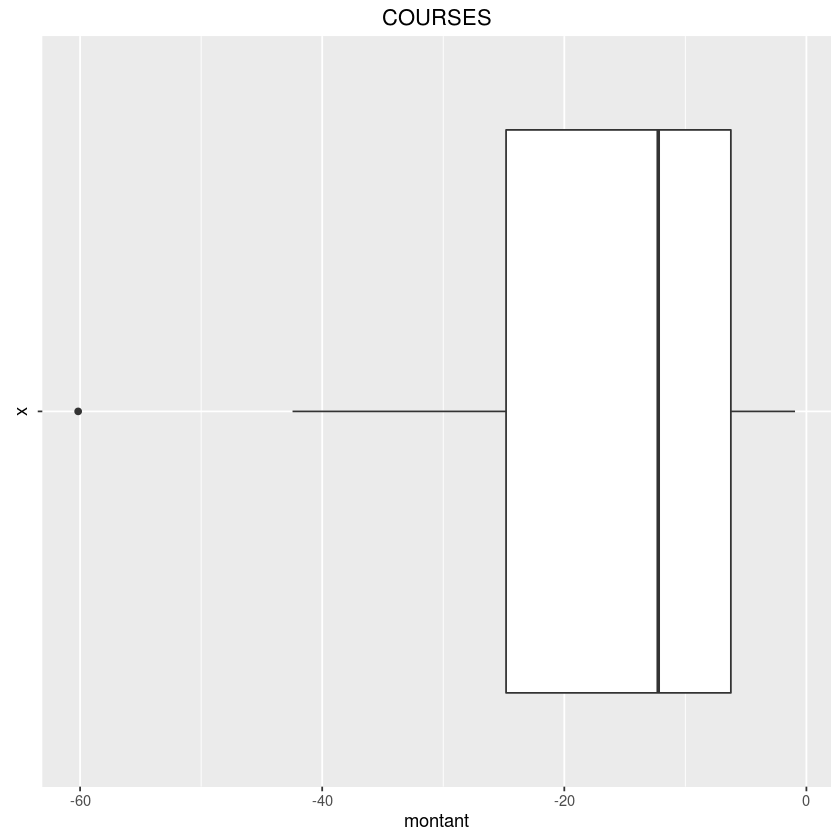

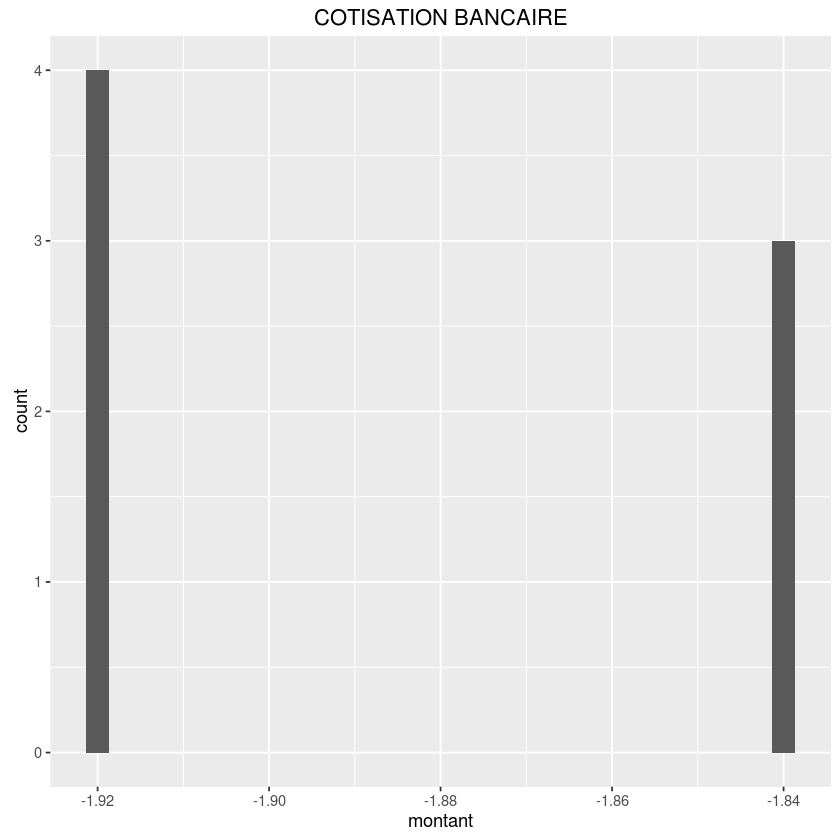

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


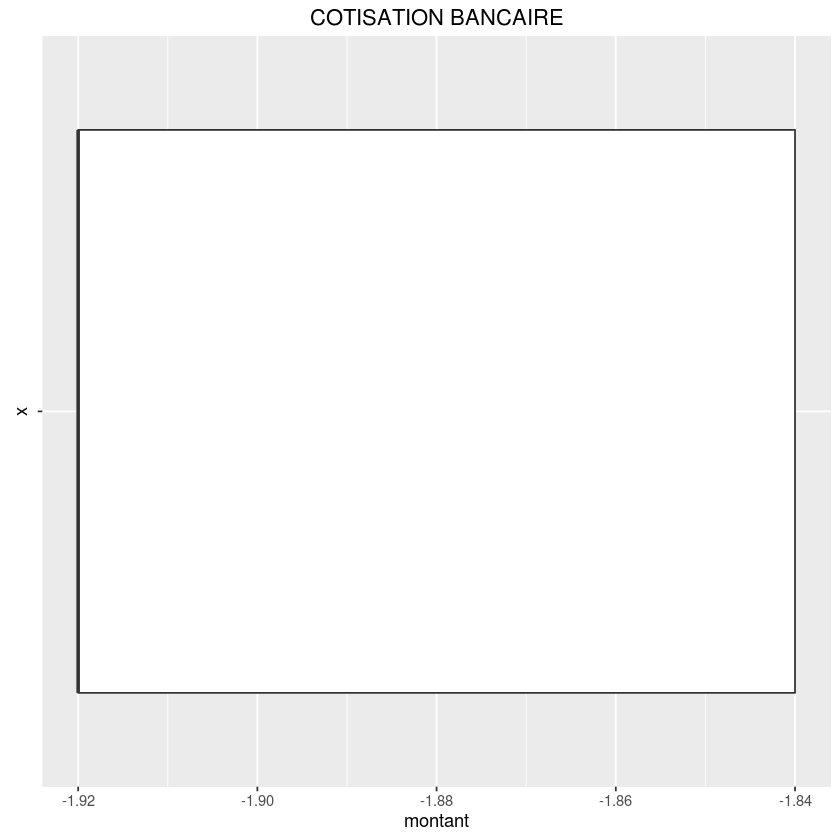

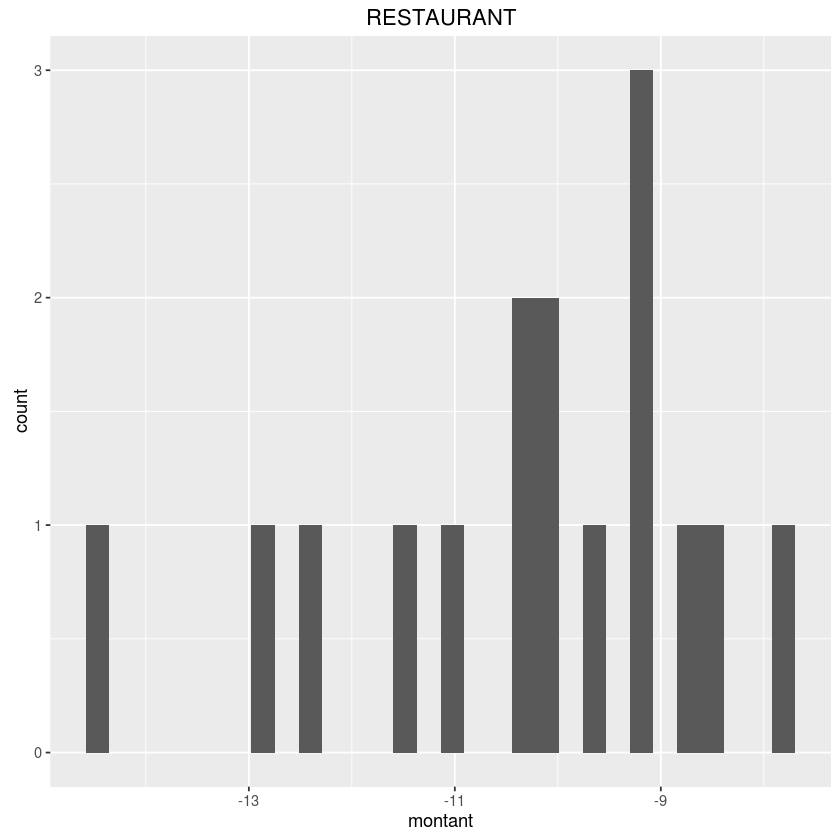

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


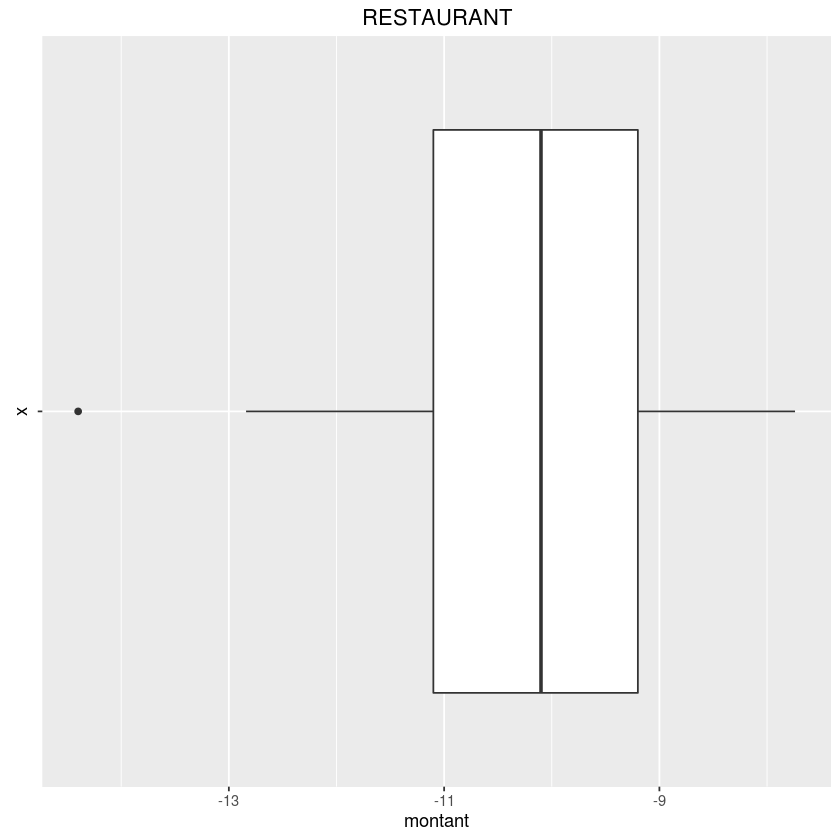

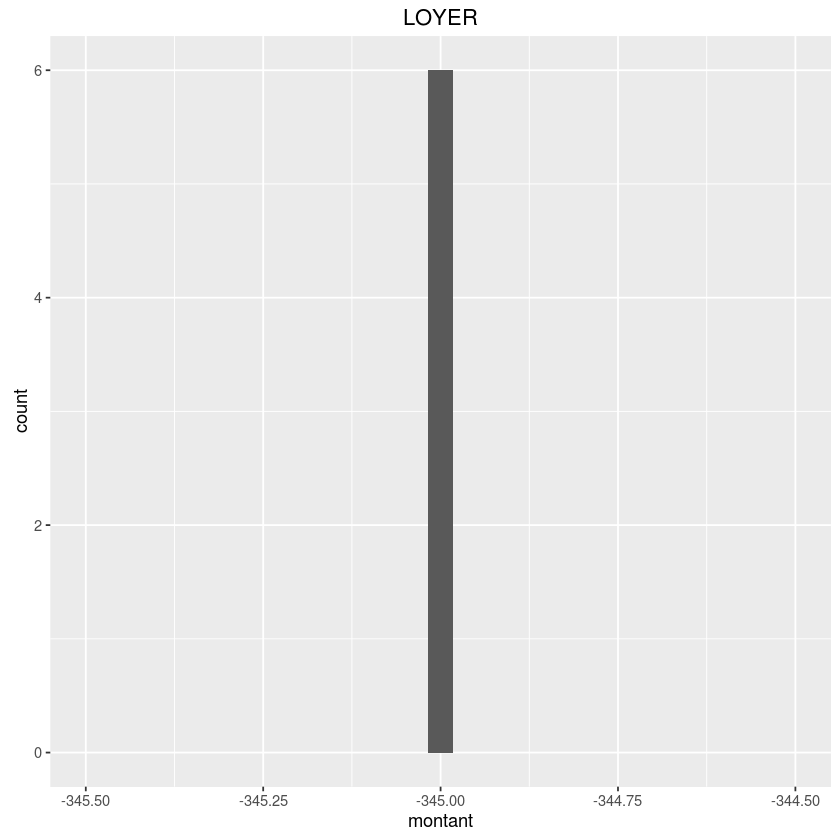

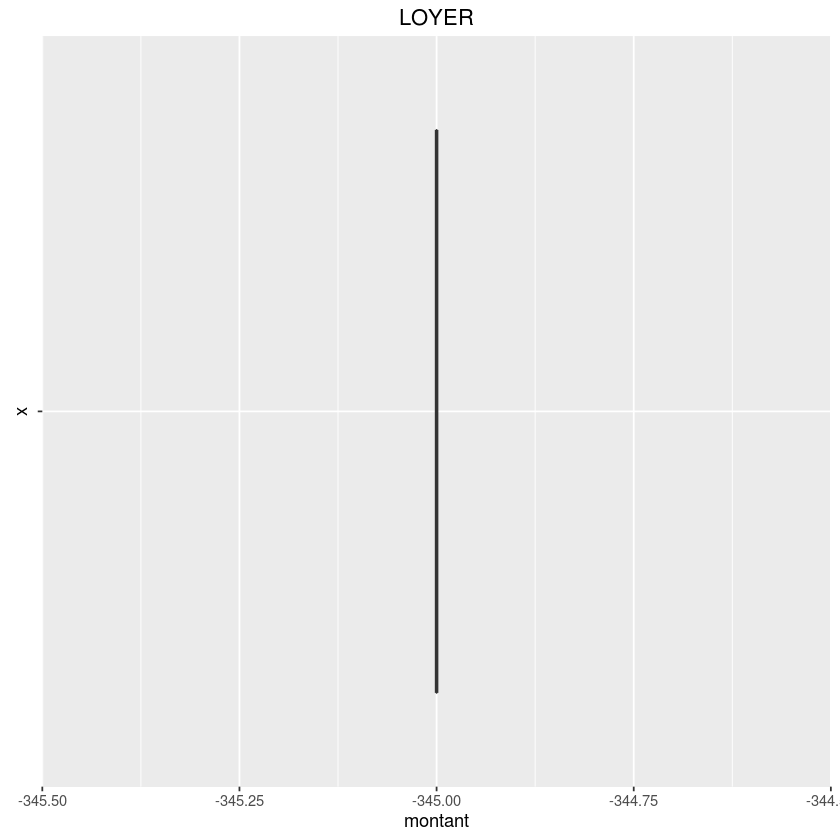

In [11]:
#install.packages("moments")
library(moments)

for(cat in unique(data$categ)){
    sous_echantillon = data[data$categ == cat,]
    print("--------------------")
    print(cat)
    print("moy");print(mean(sous_echantillon$montant))
    print("med");print(median(sous_echantillon$montant))
    # Calculs de la variance et écart-type corrigés. 
    # Multiplier par (n-1)/n pour obtenir les valeurs empiriques
    # avec n = nrow(sous_echantillon)
    print("var");print(var(sous_echantillon$montant))
    print("std");print(sd(sous_echantillon$montant))
    print("skw");print(skewness(sous_echantillon$montant))
    print("kur");print(kurtosis(sous_echantillon$montant)) 
}

for(cat in unique(data$categ)){
    sous_echantillon = data[data$categ == cat,]
    print(ggplot(sous_echantillon, aes(montant)) + geom_histogram() + labs(title=cat))
    print(ggplot(sous_echantillon, aes(x="", y=montant)) + geom_boxplot() + coord_flip() + labs(title=cat))
}


# Mesures de concentration

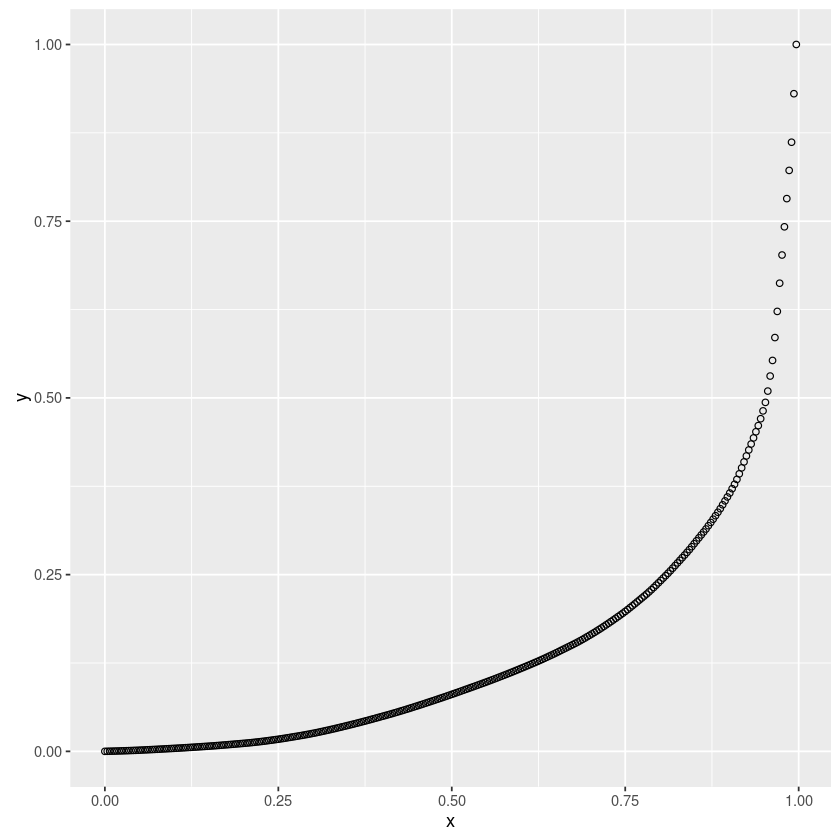

In [12]:
depenses = data[data['montant'] < 0,]
dep = -depenses$montant
lorenz = cumsum(sort(dep)) / sum(dep)
lorenz = c(0,lorenz) # La courbe de Lorenz commence à 0

n = length(lorenz)
lorenz_df = data.frame(x=((0:(n-1))/n), y=lorenz)

ggplot(lorenz_df, aes(x,y)) + geom_point(shape=1)

In [13]:
n = length(lorenz)
aire_ss_courbe = sum(lorenz[1:(n-1)])/n # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S
gini

[1] 0.7248207

# Analyse bivariée : 2 variables quanti

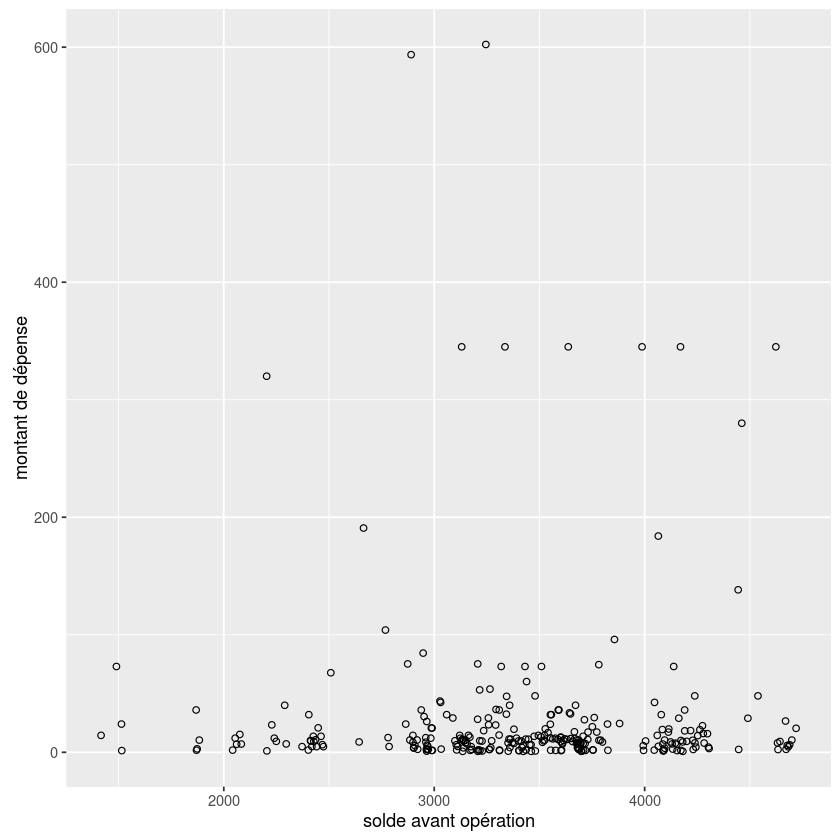

In [14]:
depenses = data[data$montant < 0,]
depenses$montant = -depenses$montant
#plt.plot(depenses["solde_avt_ope"],-depenses["montant"],'o',alpha=0.5)
#plt.xlabel("solde avant opération")
#plt.ylabel("montant de dépense")
#plt.show()

ggplot(depenses, aes(solde_avt_ope,montant)) + geom_point(shape=1) + 
    labs(x="solde avant opération", y="montant de dépense")

In [15]:
cor(depenses$solde_avt_ope, depenses$montant, method="pearson")

[1] 0.01453615

In [16]:
# calcule la covariance empirique corrigée.
# Multiplier par (n-1)/n pour obtenir la covariance empirique
# avec n = nrow(depenses)
cov(depenses$solde_avt_ope, depenses$montant)

[1] 707.5256

## Régression linéaire

### Calcul de la variable *attente*

In [17]:
# Selection du sous-échantillon
courses = data[data$categ == "COURSES",]

# On trie les opérations par date
courses = courses[order(courses$date_operation),]

# On ramène les montants en positif
courses["montant"] = -courses["montant"]

# calcul de la variable attente
r = c()
last_date = Sys.Date()
for(i in 1:nrow(courses)){
    days = as.Date(courses[i,"date_operation"])-last_date
    days = as.numeric(days, units="days")
    if(days == 0)
        r = c(r,r[length(r)])
    else
        r = c(r,days)
    last_date = as.Date(courses[i,"date_operation"])
}
courses["attente"] = r
courses = courses[2:nrow(courses),]

# on regroupe les opérations qui ont été effectués à la même date
# (courses réalisées le même jour mais dans 2 magasins différents)
a = aggregate(courses$montant,list(courses$date_operation),FUN=sum)
b = aggregate(courses$attente,list(courses$date_operation),FUN=(function (x) x[1])) 
courses = data.frame(montant=a$x,attente=b$x)

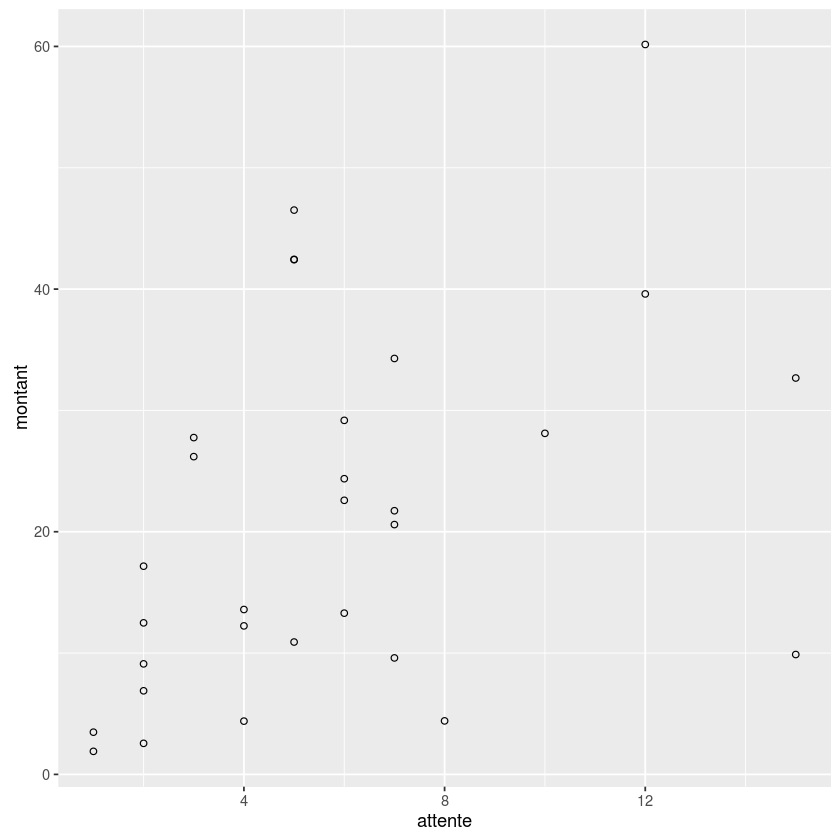

In [18]:
ggplot(courses, aes(attente,montant)) + geom_point(shape=1) + 
    labs(x="attente", y="montant")

### Régression linéaire

In [19]:
coeffs = lm(montant~attente,data=courses)$coefficients
print(coeffs)
coeffs = as.numeric(coeffs)
a = coeffs[2]
b = coeffs[1]

(Intercept)     attente 
  10.944848    1.736578 


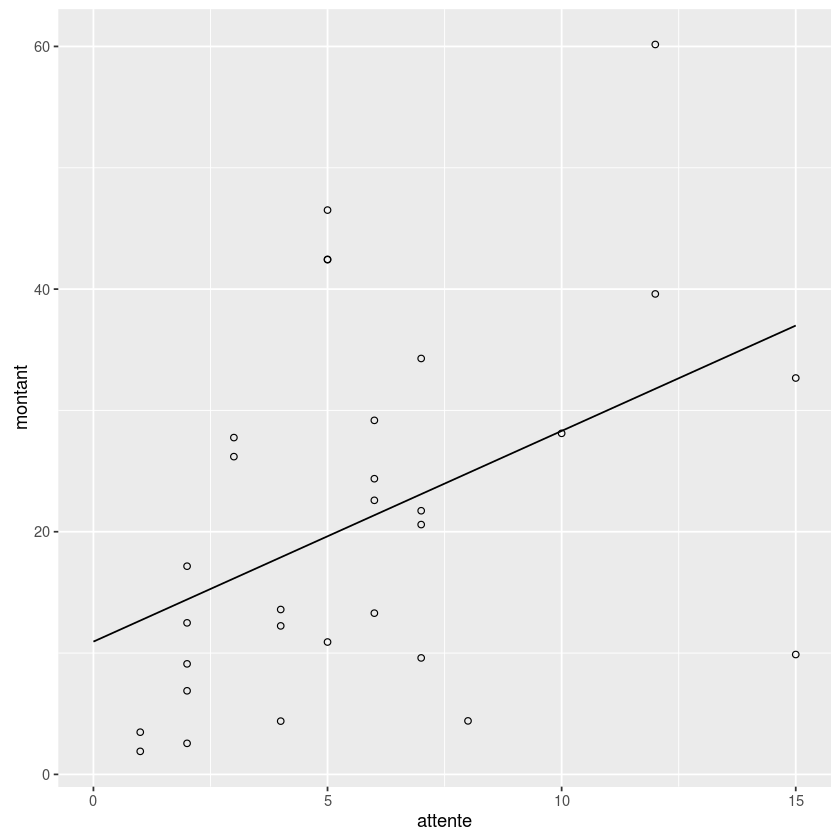

In [20]:
droite = data.frame(x=c(0,15),y=c(a*0+b, a*15+b))
ggplot(courses, aes(attente,montant)) + geom_point(shape=1) + 
    geom_line(data=droite, aes(x=x,y=y))

### Régression linéaire sans outliers

In [21]:
courses = courses[courses$attente < 15,]

(Intercept)     attente 
   5.411480    3.030823 


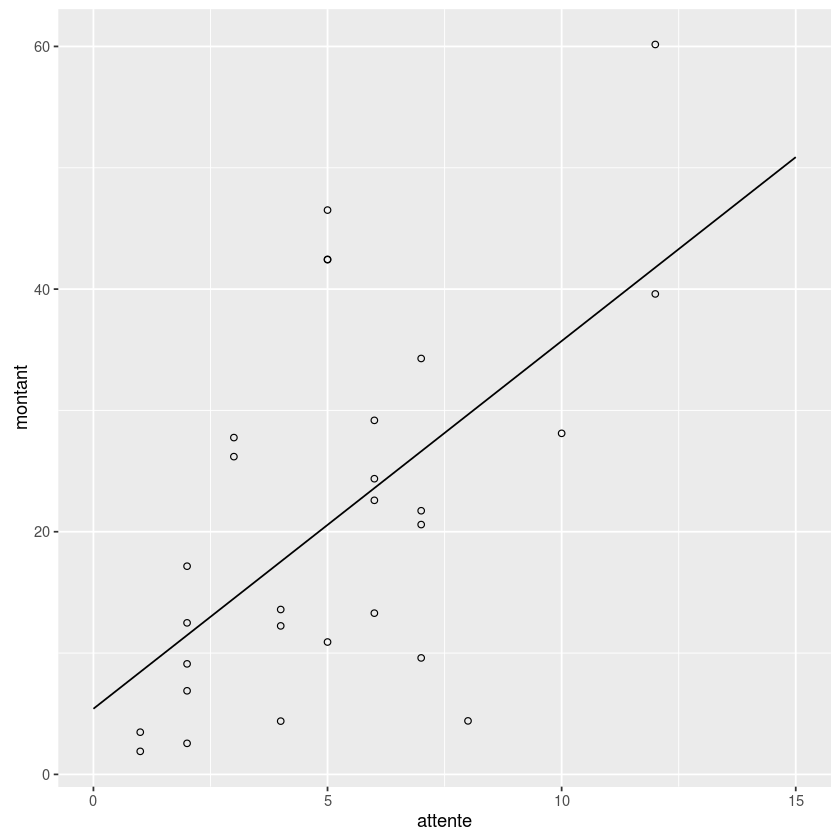

In [22]:
coeffs = lm(montant~attente,data=courses)$coefficients
print(coeffs)
coeffs = as.numeric(coeffs)
a = coeffs[2]
b = coeffs[1]

droite = data.frame(x=c(0,15),y=c(a*0+b, a*15+b))
ggplot(courses, aes(attente,montant)) + geom_point(shape=1) + 
    geom_line(data=droite, aes(x=x,y=y))

# Analyse bivariée : 1 variable quanti et 1 quali

In [23]:
X = "categ" # qualitative
Y = "montant" # quantitative

# On ne garde que les dépenses
sous_echantillon = data[data["montant"] < 0,]
# On remet les dépenses en positif
sous_echantillon["montant"] = -sous_echantillon["montant"]
# On n'étudie pas les loyers car trop gros:
sous_echantillon = sous_echantillon[sous_echantillon["categ"] != "LOYER",] 

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_summary).”

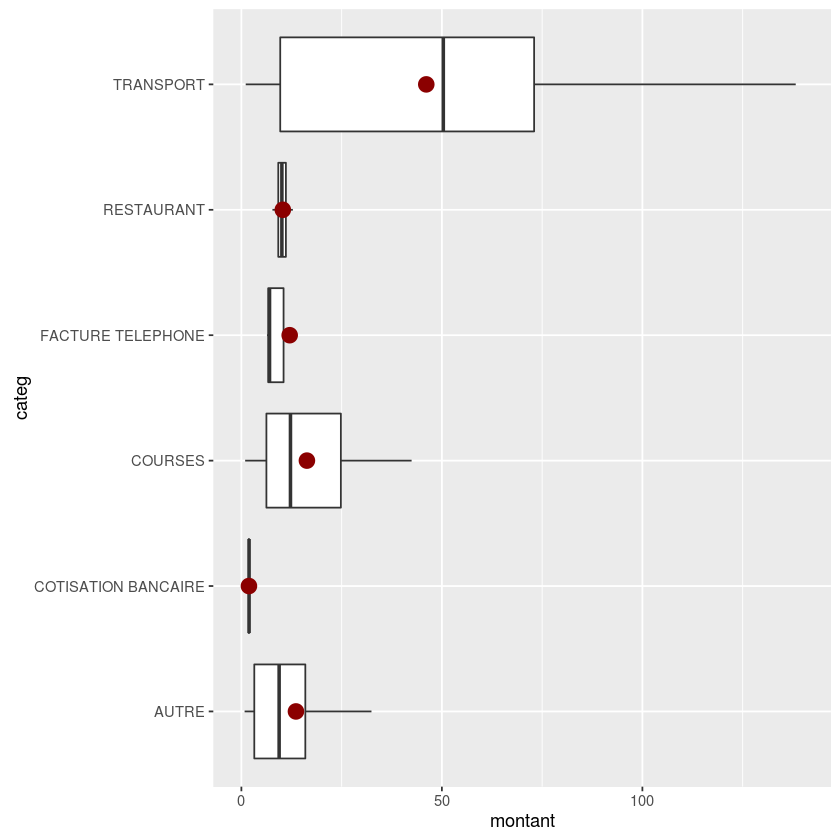

In [24]:
ggplot(sous_echantillon, aes(x=categ, y=montant)) + 
    geom_boxplot(outlier.shape = NA) + coord_flip() + 
    stat_summary(fun.y=mean, colour="darkred", geom="point", shape=19, size=4) +
    scale_y_continuous(limits = c(0,140))

## ANOVA

In [25]:
X = "categ" # qualitative
Y = "montant" # quantitative

# On ne garde que les dépenses
sous_echantillon = data[data["montant"] < 0,]

eta_squared = function(x,y){
    moyenne_y = mean(y)
    classes = c()
    for(classe in unique(x)){
        yi_classe = y[x==classe]
        classes = c(classes,
                    list(
                        list('ni'= length(yi_classe),
                            'moyenne_classe' = mean(yi_classe))))
    }
    SCT = 0
    for(yj in y){SCT = SCT + (yj-moyenne_y)^2}
    SCE = 0
    for(c in classes){
        SCE = SCE + c$ni*(c$moyenne_classe-moyenne_y)^2
    }
    return(SCE/SCT)
}

eta_squared(sous_echantillon[,X],sous_echantillon[,Y])

[1] 0.3984189

# Analyse bivariée : 1 variable quanti et 1 quali

In [26]:
X = "quart_mois"
Y = "categ"

c = as.data.frame.matrix(table(data[,c(X,Y)]))
cont = c

tx = rowSums(cont)
ty = colSums(cont)

cont[,"total"] = tx
cont["total",(1:(ncol(cont)-1))] = ty
cont["total","total"] = nrow(data)
cont

,AUTRE,COTISATION BANCAIRE,COURSES,FACTURE TELEPHONE,LOYER,RESTAURANT,TRANSPORT,total
1,55,7,6,6,0,3,9,86
2,45,0,11,1,6,7,6,76
3,60,0,7,0,0,4,4,75
4,52,0,15,0,0,2,2,71
total,212,7,39,7,6,16,21,308


In [27]:
indep = tx %*% t(ty) / nrow(data)

mesure = (c-indep)^2/indep
xi_n = sum(mesure)

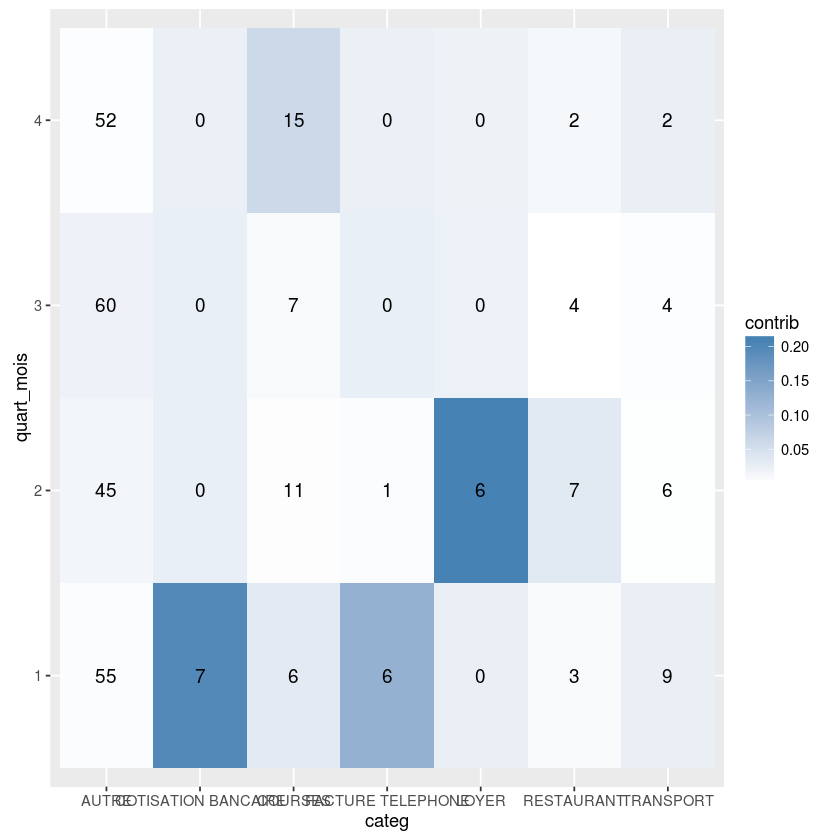

In [28]:
contributions = mesure/xi_n

cont_reshaped = as.data.frame(table(data[,c(X,Y)]))
cont_reshaped["contrib"] = NA
for(i in 1:nrow(cont_reshaped)){
    x = cont_reshaped[i,X]
    y = cont_reshaped[i,Y]
    cont_reshaped[i,"contrib"] = contributions[x,y]
}
ggplot(cont_reshaped, aes_string(X,Y)) +    
    geom_tile(aes(fill = contrib)) +
    geom_text(aes(label=Freq), size=4) +
    scale_fill_gradient(low = "white", high = "steelblue") +
    coord_flip()